In [175]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (3,3)) #define the image size

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

In [176]:
#transforming the PIL Image to tensors
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# https://github.com/yunjey/pytorch-tutorial/issues/161
# transform = transforms.Compose([
# transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5, ))])


trainset = torchvision.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transform)
testset = torchvision.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transform)

In [177]:
#loading the training data from trainset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)
#loading the test data from testset
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [178]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')
def imshow(img):
    npimg = img.numpy() #convert the tensor to numpy for displaying the image
    #for displaying the image, shape of the image should be height * width * channels 
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

In [179]:
print(len(trainset.data))
print(len(trainset.targets))

60000
60000


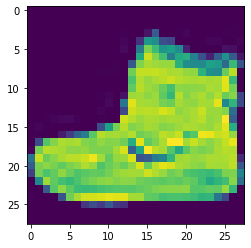

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
tensor(9)
Ankle boot
784 28


In [180]:
# imshow(trainset.data.[0])
itemNumber=0
npimg=trainset.data[itemNumber].numpy()
plt.imshow(npimg)
plt.show()
print(trainset.classes)
print(trainset.targets[itemNumber])
print(trainset.classes[trainset.targets[itemNumber].item()])
print(npimg.size,len(npimg))

In [181]:
# Create NN
# REF: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

In [235]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120) #16 * 5 * 5 -> 1024
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
#         print(x.size())
        x = self.pool(F.relu(self.conv1(x)))
#         print(x.size())
        x = self.pool(F.relu(self.conv2(x)))
#         print(x.size())
        x = x.view(-1, 256) # 16 * 5 * 5 -> 1024
#         print(x.size())
        x = F.relu(self.fc1(x))
#         print(x.size())
        x = F.relu(self.fc2(x))
#         print(x.size())
        x = self.fc3(x)
#         print(x.size())
        return x


net = Net()


# class LeNet(nn.Module):
#     def init(self):
#         super(LeNet, self).init()
#         self.cnn_model = nn.Sequential(
#         nn.Conv2d(3, 6, kernel_size = 5), #, (N, 1, 28, 28) -> (N, 6, 24, 24)
#         #              nn.Tanh(),
#         nn.MaxPool2d(2, stride = 2), #(N, 6, 24, 24) -> (N, 6, 12, 12)
#         nn.Conv2d(6, 16, kernel_size = 5), #(N, 6, 12, 12) -> (N, 6, 8, 8)
#         #              nn.Tanh(),
#         nn.MaxPool2d(2, stride = 2)) #(N, 6, 8, 8) -> (N, 16, 4, 4)
#         self.fc_model = nn.Sequential(
#         nn.Linear(256, 120), # (N, 256) -> (N, 120)
#         #              nn.Tanh(),
#         nn.Linear(120, 84), # (N, 120) -> (N, 84)
#         #              nn.Tanh(),
#         nn.Linear(84, 10))  # (N, 84)  -> (N, 10)) #10 classes
#     def forward(self, x):     
#         x = self.cnn_model(x)     
#         x = x.view(x.size(0), -1)     
#         x = self.fc_model(x)     
#         return x
# net = LeNet()
# loss_fn = nn.CrossEntropyLoss()
# opt = optim.Adam(net.parameters())

In [236]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [237]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
#         print(inputs,labels)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.552
[1,  4000] loss: 0.666
[1,  6000] loss: 0.580
[1,  8000] loss: 0.521
[1, 10000] loss: 0.461
[1, 12000] loss: 0.451
[1, 14000] loss: 0.428
[2,  2000] loss: 0.396
[2,  4000] loss: 0.384
[2,  6000] loss: 0.372
[2,  8000] loss: 0.376
[2, 10000] loss: 0.361
[2, 12000] loss: 0.366
[2, 14000] loss: 0.361
Finished Training


In [238]:
PATH = './fashionmnist_net.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


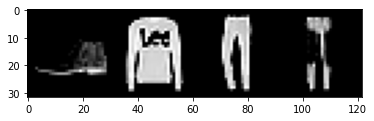

GroundTruth:  Ankle Boot Pullover Trouser Trouser


In [239]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [240]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [241]:
outputs = net(images)

In [242]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  Ankle Boot Pullover Trouser Trouser


In [243]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 86 %


In [244]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-Shirt : 73 %
Accuracy of Trouser : 93 %
Accuracy of Pullover : 80 %
Accuracy of Dress : 90 %
Accuracy of  Coat : 83 %
Accuracy of Sandal : 93 %
Accuracy of Shirt : 63 %
Accuracy of Sneaker : 93 %
Accuracy of   Bag : 95 %
Accuracy of Ankle Boot : 97 %
